# Exploratory Data Analysis

### Check if Data loads properly

In [1]:
import pandas as pd
import numpy as np

In [2]:
scripts = pd.read_csv('data/processed_scripts.csv')
meta = pd.read_csv('data/metadata.csv')

In [3]:
scripts.head()

,Season,Episode,Title,Speaker,Dialog,S-E
0,4,10,The Girl From Poughkeepsie,Ross,hey,04-10
1,4,10,The Girl From Poughkeepsie,Ross,im sorry im late did i miss anything,04-10
2,4,10,The Girl From Poughkeepsie,Phoebe,joey stuffing 15 oreos in his mouth,04-10
3,4,10,The Girl From Poughkeepsie,Ross,15 your personal best,04-10
4,4,10,The Girl From Poughkeepsie,Phoebe,where were you,04-10


In [4]:
meta.head()

,S-E,Viewers,Stars
0,01-01,21.5,8.3
1,01-02,20.2,8.1
2,01-03,19.5,8.2
3,01-04,19.7,8.1
4,01-05,18.6,8.5


## 1. Visualise metadata

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Overall Visualisation

Highest Viewed Episode  :  52.90 Million
Lowest  Viewed Episode  :  15.65 Million
Average Episode Views   :  25.03 Million
Standard Deviation      :   4.57 Million


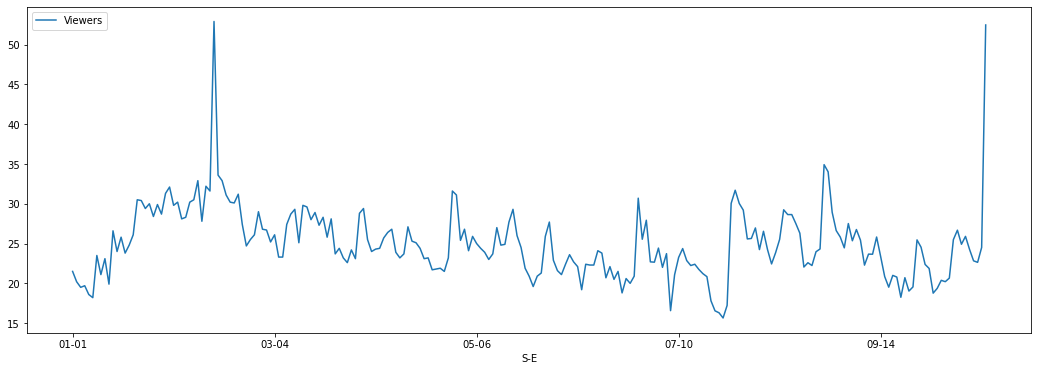

In [6]:
print(f"Highest Viewed Episode  : {max(meta.Viewers): .2f} Million")
print(f"Lowest  Viewed Episode  : {min(meta.Viewers): .2f} Million")
print(f"Average Episode Views   : {meta.Viewers.mean(): .2f} Million")
print(f"Standard Deviation      :  {meta.Viewers.std(): .2f} Million")

meta.plot('S-E', 'Viewers', figsize=(18,6))
plt.show()

Highest Episode Rating :  9.70
Lowest  Episode Rating :  7.20
Average Episode Rating :  8.44
Standard Deviation     :  0.39


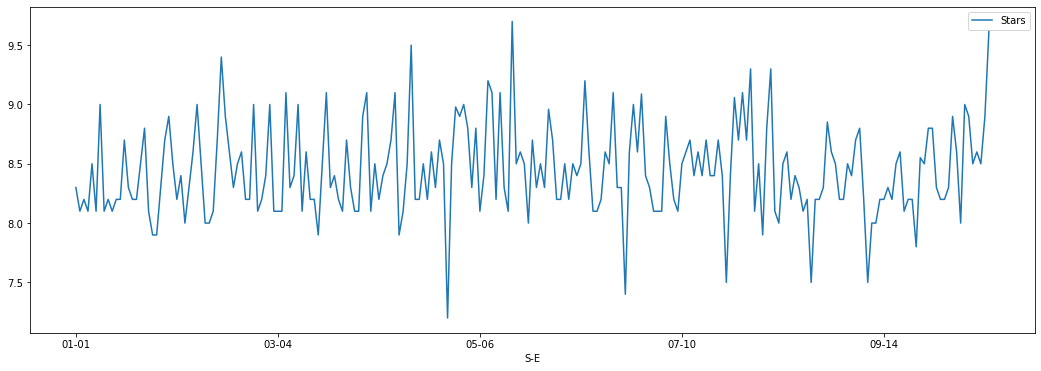

In [7]:
print(f"Highest Episode Rating : {max(meta.Stars): .2f}")
print(f"Lowest  Episode Rating : {min(meta.Stars): .2f}")
print(f"Average Episode Rating : {meta.Stars.mean(): .2f}")
print(f"Standard Deviation     : {meta.Stars.std(): .2f}")

meta.plot('S-E', 'Stars', figsize=(18,6))
plt.show()

Correlation Coefficient between viewership and rating: 0.32345807568000134


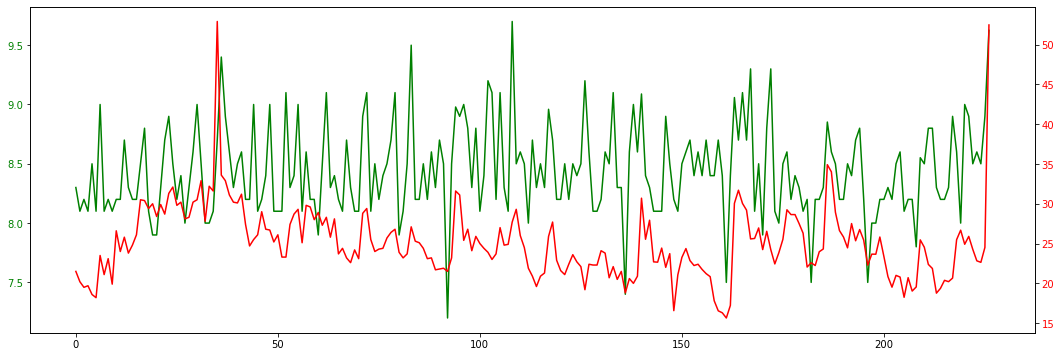

In [8]:
print(f"Correlation Coefficient between viewership and rating: {meta['Stars'].corr(meta['Viewers'])}")

fig, ax = plt.subplots(figsize=(18,6))

ax.plot(meta.Stars, color='green')
ax.tick_params(axis='y', labelcolor='green')

ax2 = ax.twinx()

ax2.plot(meta.Viewers, color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

### 1.2 Season - Wise

In [9]:
# Extracting episode and season information for ease
meta['Season'] = meta['S-E'].str[:2].astype(int)
meta['Episode'] = meta['S-E'].str[3:].astype(int)
meta.head()

,S-E,Viewers,Stars,Season,Episode
0,01-01,21.5,8.3,1,1
1,01-02,20.2,8.1,1,2
2,01-03,19.5,8.2,1,3
3,01-04,19.7,8.1,1,4
4,01-05,18.6,8.5,1,5


In [10]:
seasons = meta.Season.unique()

#### 1.2.1 Intra-Season Variations

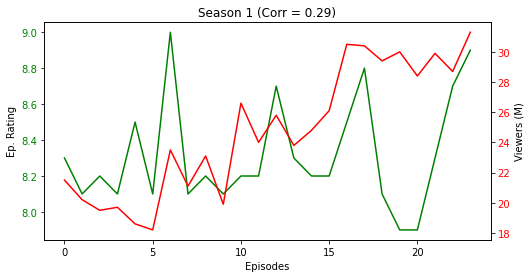

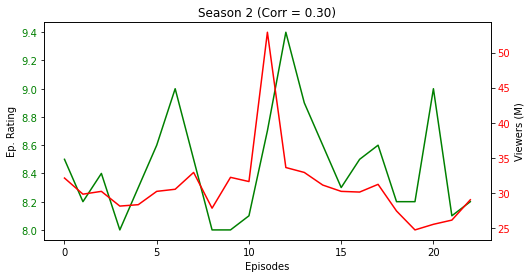

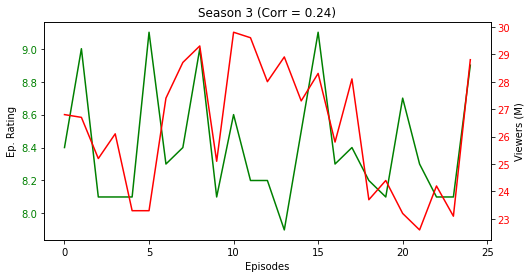

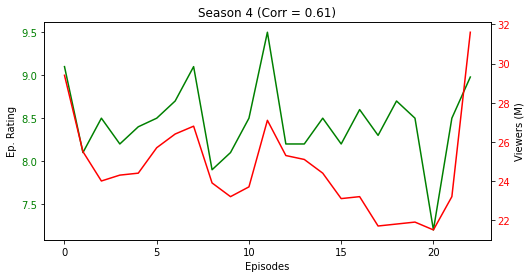

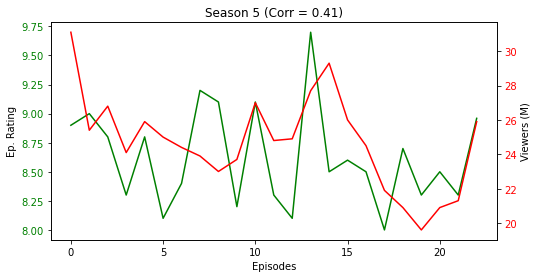

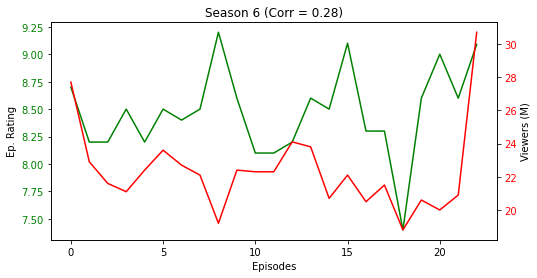

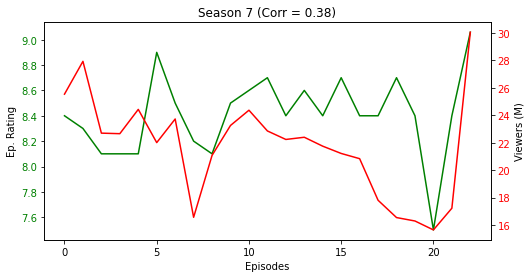

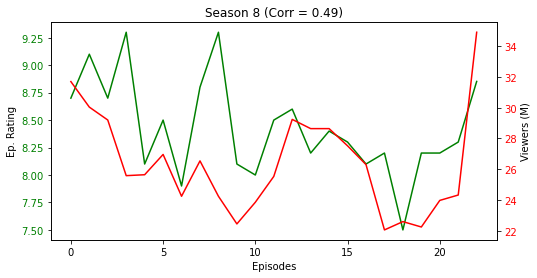

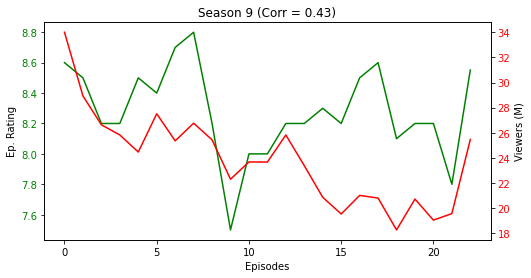

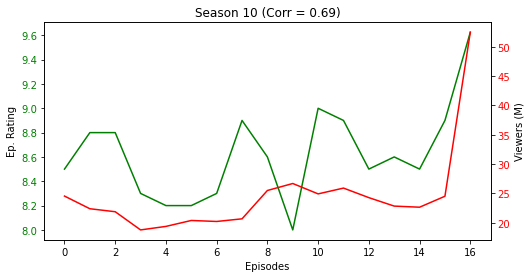

In [11]:
for season in seasons:
    viewers = meta[meta.Season == season].Viewers.values
    stars = meta[meta.Season == season].Stars.values
    # episodes = meta[meta.Season == season].Episode.values
    
    fig, ax = plt.subplots(figsize=(8,4))

    ax.plot(stars, color='green')
    ax.tick_params(axis='y', labelcolor='green')
    ax.set_title(f"Season {season} (Corr ={np.corrcoef(viewers, stars)[0][1]: .2f})")
    ax.set_xlabel("Episodes")
    ax.set_ylabel("Ep. Rating")

    ax2 = ax.twinx()

    ax2.plot(viewers, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylabel("Viewers (M)")

    plt.show()
    

#### 1.2.2 Inter-Season Variation

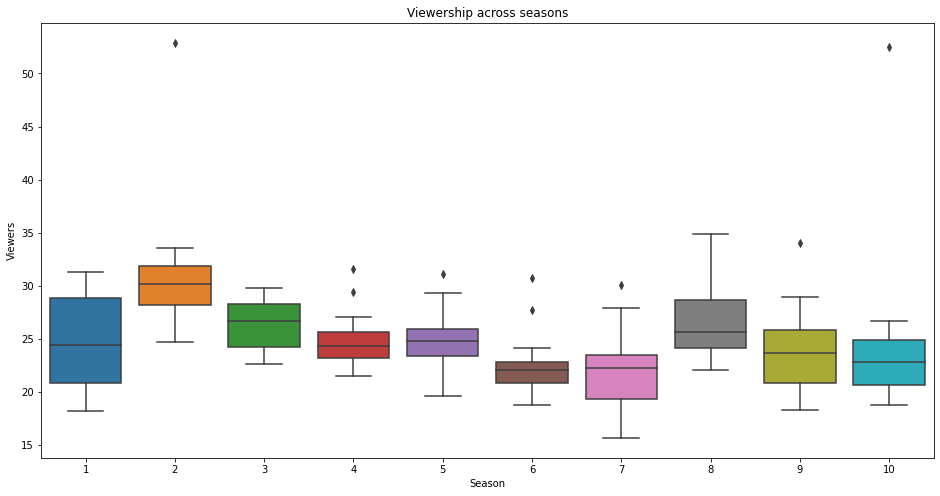

In [12]:
# Viewership boxplot
plt.figure(figsize=(16,8))

sns.boxplot(
    y = meta['Viewers'],
    x = meta['Season']
)
plt.title("Viewership across seasons")
plt.show()

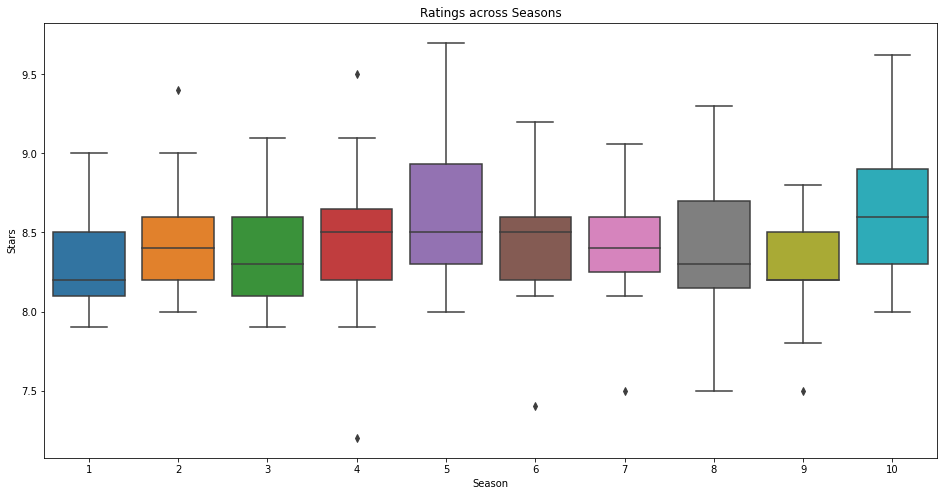

In [13]:
# Rating boxplot
plt.figure(figsize=(16,8))

sns.boxplot(
    y = meta['Stars'],
    x = meta['Season']
)
plt.title("Ratings across Seasons")
plt.show()

## 2. Visualise Script

In [14]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.util import ngrams

In [15]:
scripts.columns

Index(['Season', 'Episode', 'Title', 'Speaker', 'Dialog', 'S-E'], dtype='object')

In [16]:
scripts['Speaker'].unique()

array(['Ross', 'Phoebe', 'Chandler', 'Joey', 'Rachel', 'All', 'Monica',
       'Mike', 'Woman', 'Gunther', 'Carol', 'Gary', 'Janice', 'EDDIE',
       'Richard', 'Emily', 'Joshua', 'Danny', 'Charlie', 'Eric', 'Will',
       'Nurse', 'Man', 'Mrs. Geller', 'Steve', 'Guy', 'Dr. Green',
       'Erica', 'David', 'Mr. Geller', 'Elizabeth', 'Jill', 'Frank',
       'Mona', 'Mark', 'Tag', 'Doug', 'Ben', 'Janine', 'Pete', 'Ursula',
       'Kathy', 'Paul', 'Susan', 'Kate', 'Gavin', 'Joanna', 'Amy'],
      dtype=object)

In [17]:
lines_per_speaker = {}
for speaker in scripts.Speaker.unique():
    lines_per_speaker[speaker] = len(scripts[scripts['Speaker'] == speaker])

lines_per_speaker = {k: v for k, v in sorted(lines_per_speaker.items(), key=lambda item: item[1], reverse=True)}

Total words spoken:  55568
Percentage of words spoken by the main 6:  91.65%


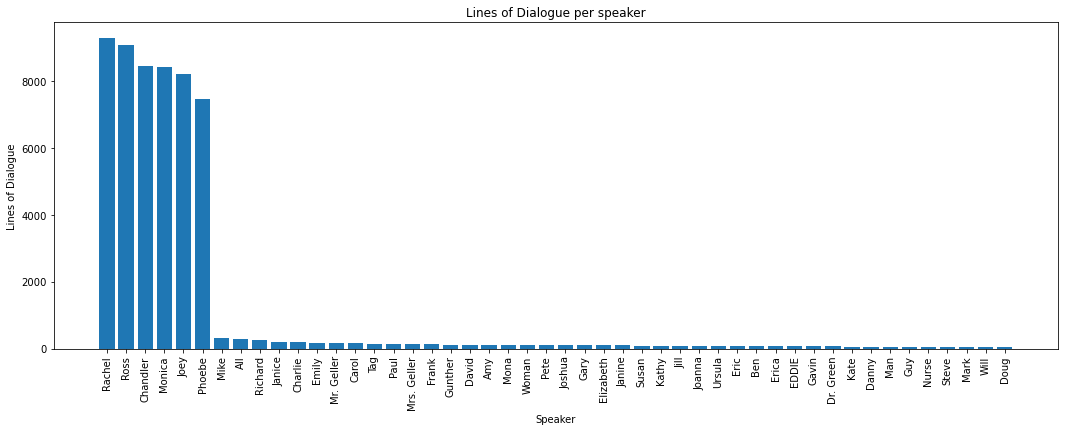

In [18]:
speaker = list(lines_per_speaker.keys())
lines = list(lines_per_speaker.values())

print("Total words spoken: ", sum(lines))
print(f"Percentage of words spoken by the main 6: {100*sum(lines[:6])/sum(lines): .2f}%")

plt.figure(figsize=(18,6))
plt.bar(range(len(lines_per_speaker)),lines,tick_label=speaker)
plt.xticks(rotation = 90)
plt.title("Lines of Dialogue per speaker")
plt.xlabel("Speaker")
plt.ylabel("Lines of Dialogue")
plt.show()

In [19]:
words_per_speaker = {}

for speaker in scripts.Speaker.unique():
    words = []
    for line in scripts[scripts['Speaker'] == speaker]['Dialog'].values:
        try:
            words.append(len(line.split()))
        except AttributeError:
            print(line)
    words_per_speaker[speaker] = sum(words)

words_per_speaker = {k: v for k, v in sorted(words_per_speaker.items(), key=lambda item: item[1], reverse=True)}

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [20]:
# Get rid of all nans
scripts = scripts[pd.notnull(scripts['Dialog'])]
scripts

,Season,Episode,Title,Speaker,Dialog,S-E
0,4,10,The Girl From Poughkeepsie,Ross,hey,04-10
1,4,10,The Girl From Poughkeepsie,Ross,im sorry im late did i miss anything,04-10
2,4,10,The Girl From Poughkeepsie,Phoebe,joey stuffing 15 oreos in his mouth,04-10
3,4,10,The Girl From Poughkeepsie,Ross,15 your personal best,04-10
4,4,10,The Girl From Poughkeepsie,Phoebe,where were you,04-10
...,...,...,...,...,...,...
55563,3,25,At The Beach,Ross,hi,03-25
55564,3,25,At The Beach,Chandler,hi there,03-25
55565,3,25,At The Beach,Monica,thats that weird voice again,03-25
55566,3,25,At The Beach,Chandler,okay okay let me try it again youre gonna wann...,03-25


Total words spoken:  568884
Percentage of words spoken by the main 6:  92.60%


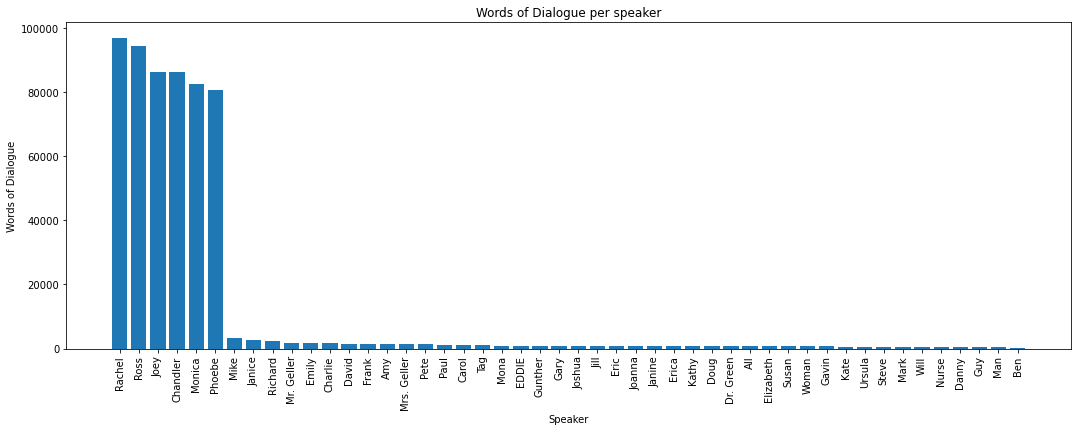

In [21]:
speaker = list(words_per_speaker.keys())
words = list(words_per_speaker.values())

print("Total words spoken: ", sum(words))
print(f"Percentage of words spoken by the main 6: {100*sum(words[:6])/sum(words): .2f}%")

plt.figure(figsize=(18,6))
plt.bar(range(len(words_per_speaker)),words,tick_label=speaker)
plt.xticks(rotation = 90)
plt.title("Words of Dialogue per speaker")
plt.xlabel("Speaker")
plt.ylabel("Words of Dialogue")
plt.show()

In [25]:
stopwords = STOPWORDS | {'im', 'hi', 'youre', 'hey', 'sorry', 'thats', 'dont', 'hes', 'whats'}

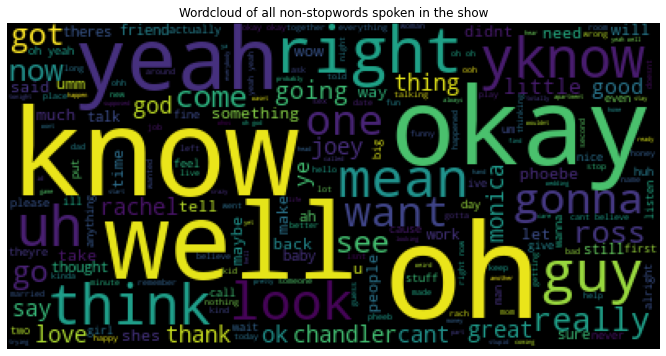

In [34]:
all_words = ' '.join(scripts.Dialog.values)
wordcloud = WordCloud(stopwords=stopwords).generate(all_words)

plt.figure(figsize=(12,6))
plt.title("Wordcloud of all non-stopwords spoken in the show")
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

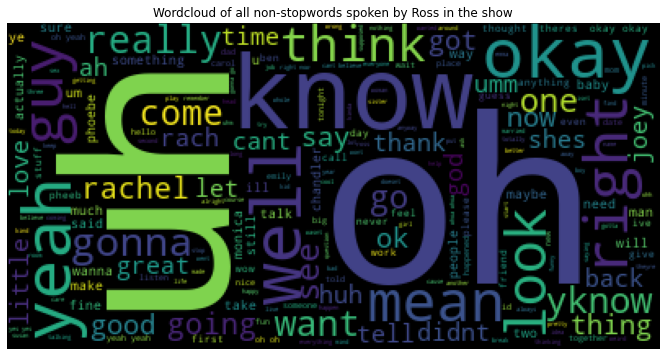

---------------------------------------------------------------------------


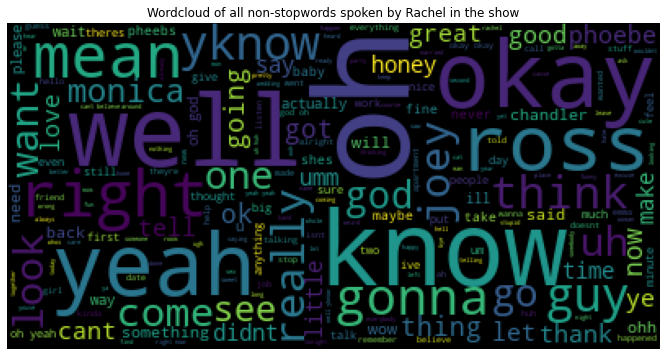

---------------------------------------------------------------------------


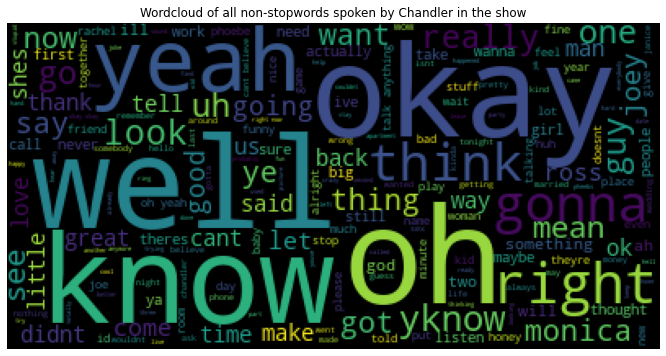

---------------------------------------------------------------------------


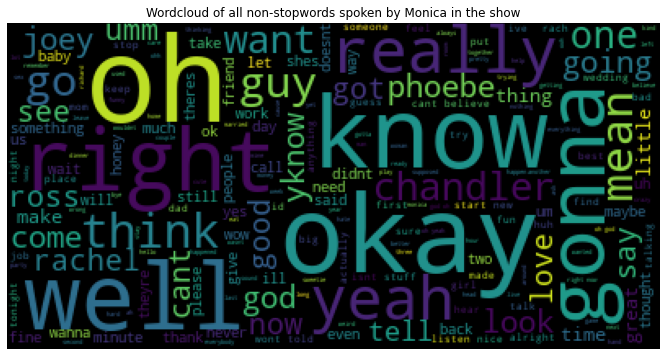

---------------------------------------------------------------------------


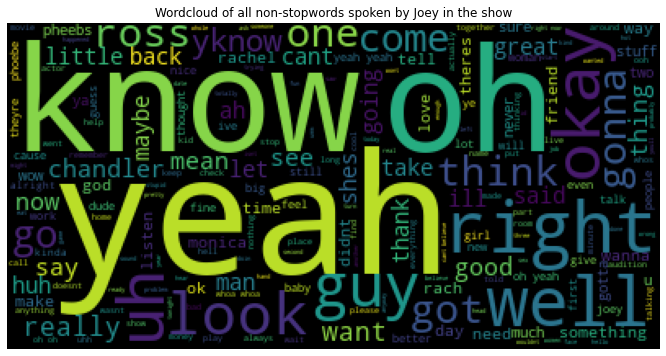

---------------------------------------------------------------------------


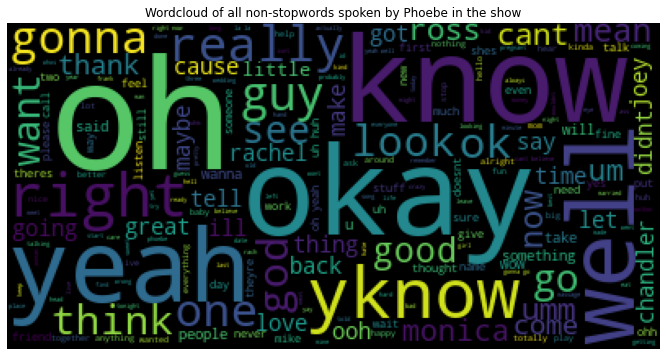

---------------------------------------------------------------------------


In [55]:
# Wordcloud per main character
chars = ['Ross', 'Rachel', 'Chandler', 'Monica', 'Joey', 'Phoebe']

for char in chars:
    words = ' '.join(scripts[scripts['Speaker'] == char].Dialog.values)
    wordcloud = WordCloud(stopwords=stopwords).generate(words)

    plt.figure(figsize=(12,6))
    plt.title(f"Wordcloud of all non-stopwords spoken by {char} in the show")
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()
    
    print("-"*75)

There are 162967 2-grams in the entire dataset


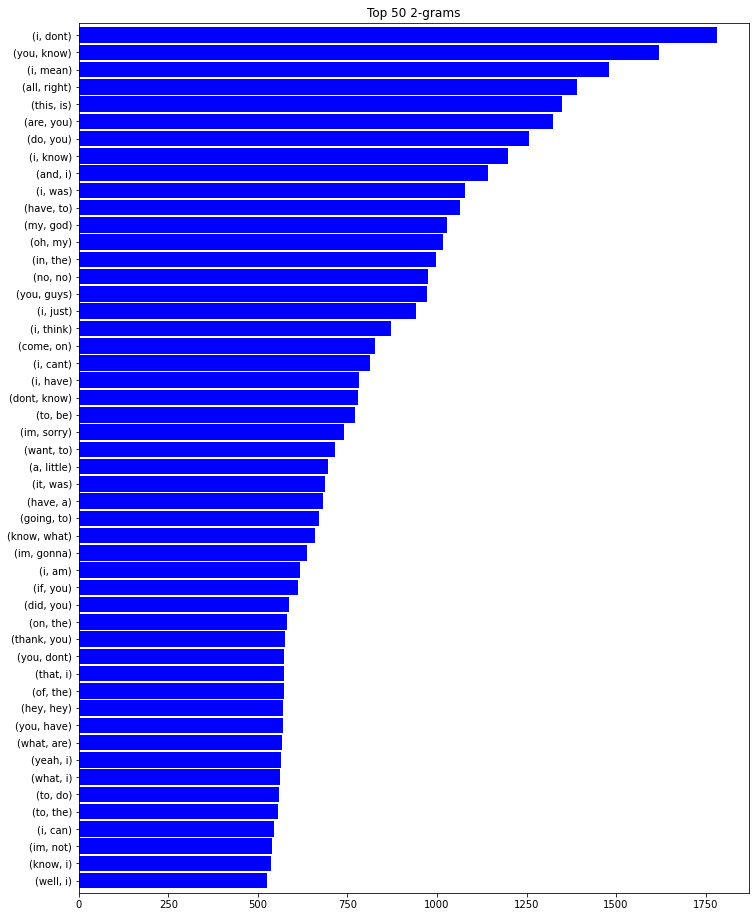

----------------------------------------------------------------------------------------------------
There are 386993 3-grams in the entire dataset


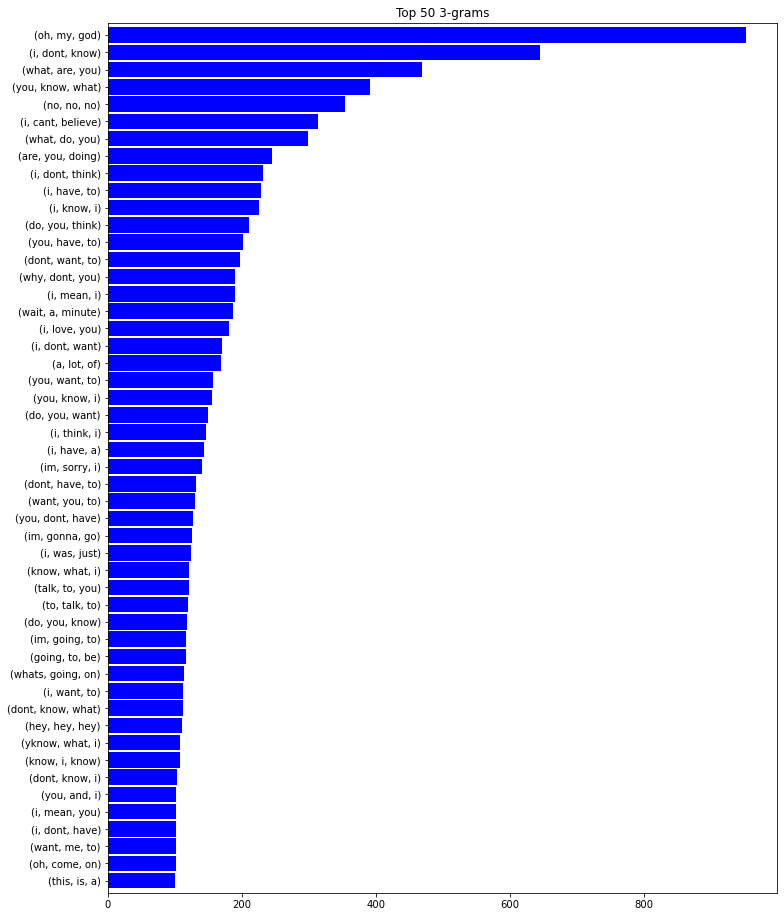

----------------------------------------------------------------------------------------------------
There are 508003 4-grams in the entire dataset


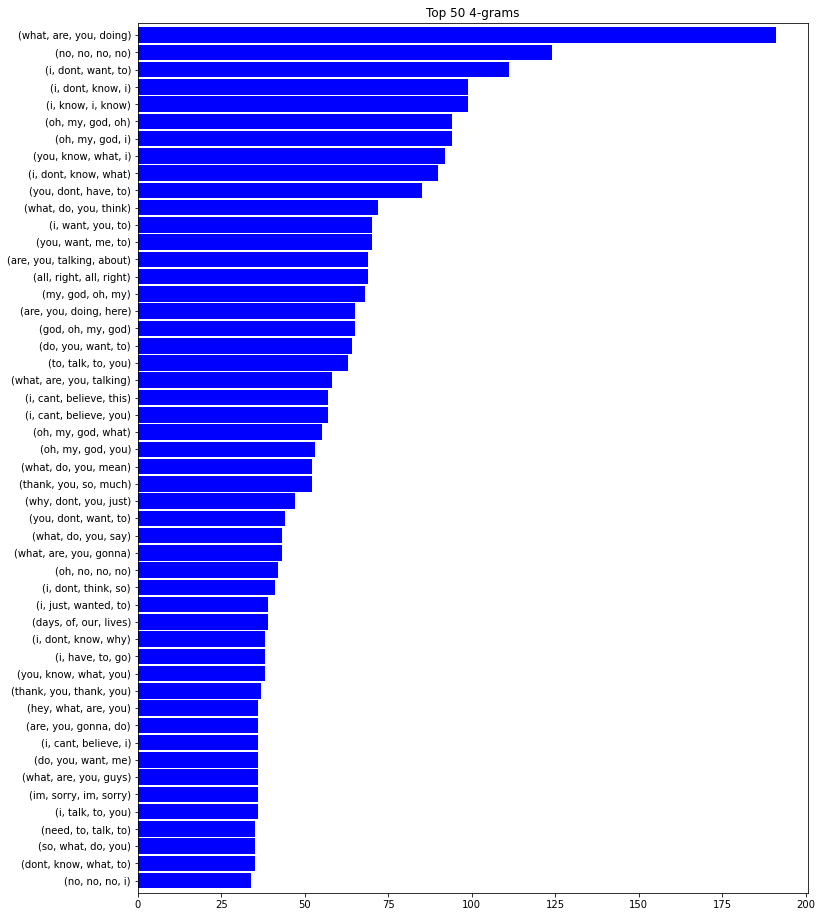

----------------------------------------------------------------------------------------------------
There are 545989 5-grams in the entire dataset


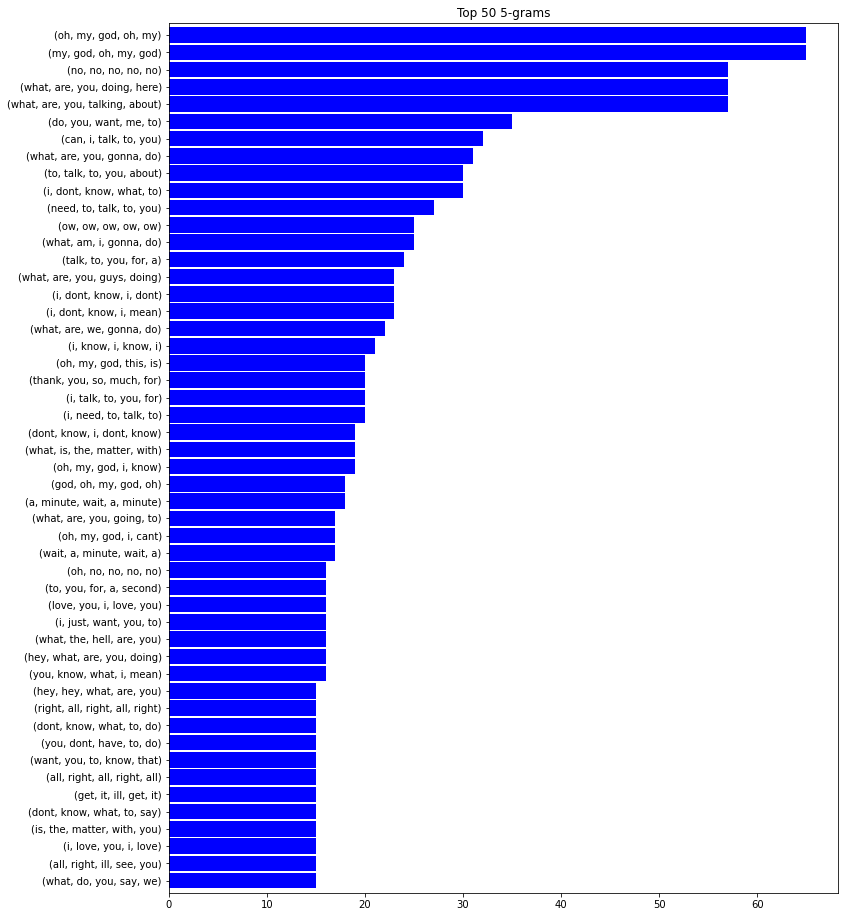

----------------------------------------------------------------------------------------------------


In [56]:
for n in [2, 3, 4, 5]:
    ngram_series = pd.Series(ngrams(all_words.split(), n)).value_counts()
    ngram_series[:50].sort_values().plot.barh(color='blue', width=.9, figsize=(12, 16))

    print(f"There are {len(ngram_series)} {n}-grams in the entire dataset")

    plt.title(f"Top 50 {n}-grams")
    plt.show()
    
    print('-' * 100)

There are 43397. 2-grams for Ross


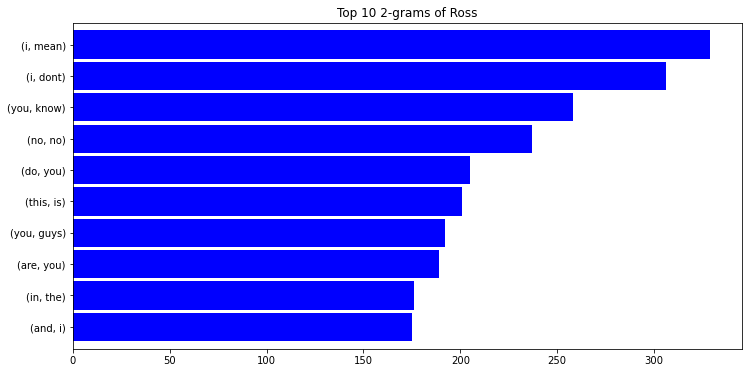

----------------------------------------------------------------------------------------------------
There are 77928. 3-grams for Ross


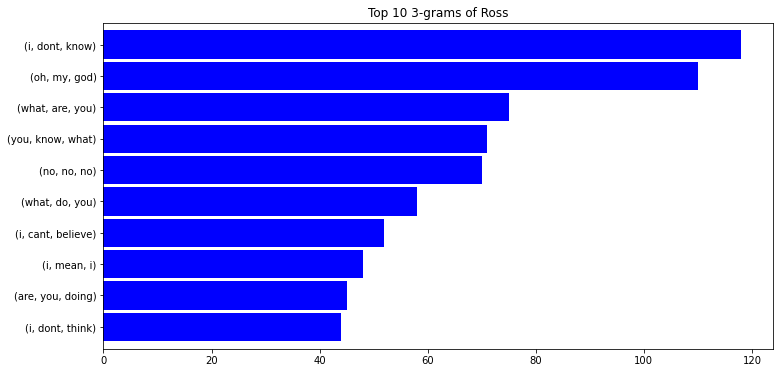

----------------------------------------------------------------------------------------------------
There are 89297. 4-grams for Ross


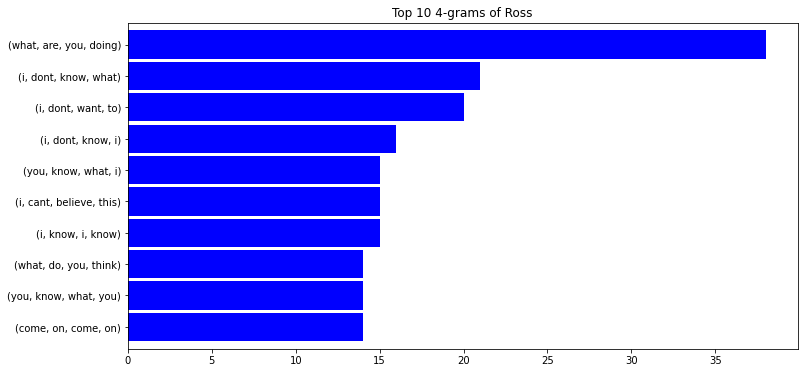

----------------------------------------------------------------------------------------------------
There are 40193. 2-grams for Rachel


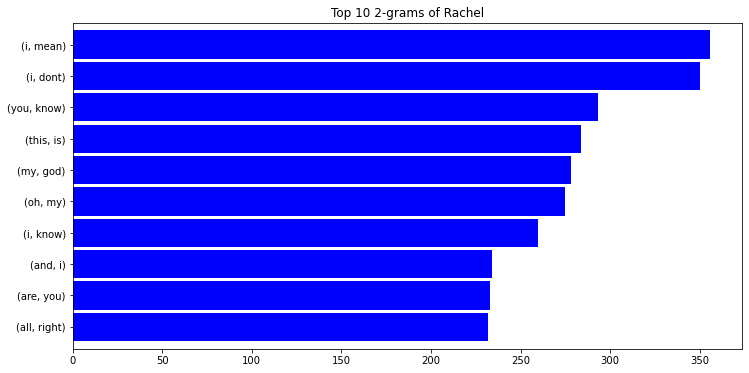

----------------------------------------------------------------------------------------------------
There are 76556. 3-grams for Rachel


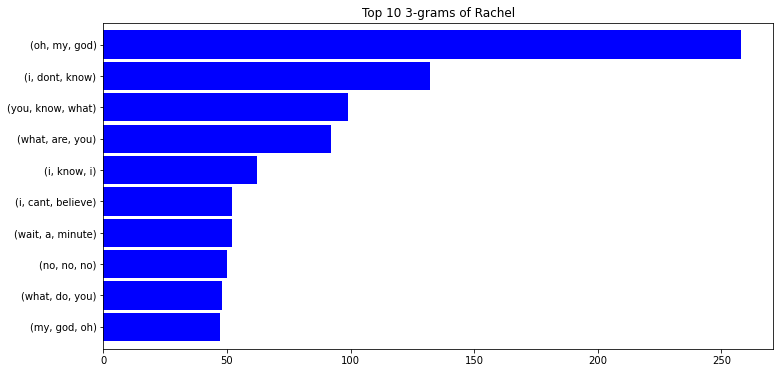

----------------------------------------------------------------------------------------------------
There are 90306. 4-grams for Rachel


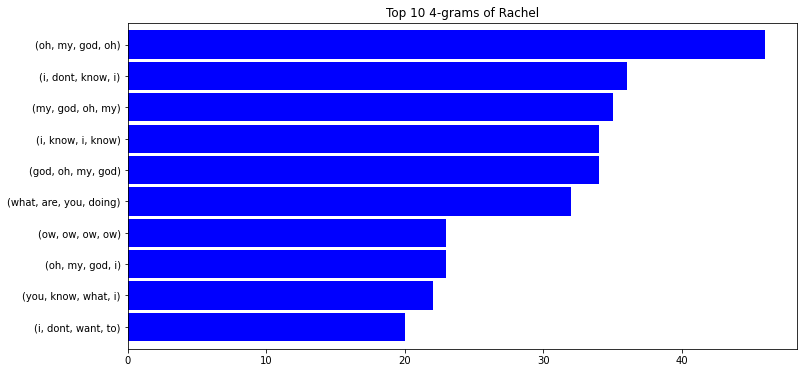

----------------------------------------------------------------------------------------------------
There are 40857. 2-grams for Chandler


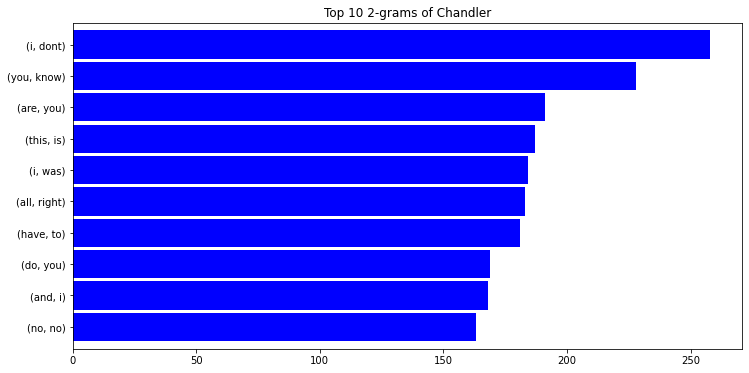

----------------------------------------------------------------------------------------------------
There are 72003. 3-grams for Chandler


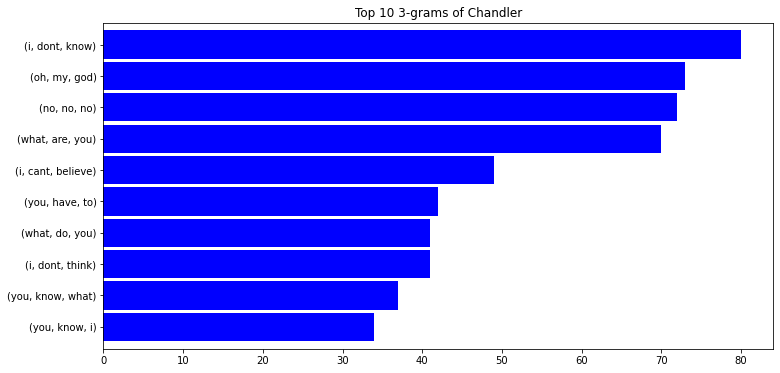

----------------------------------------------------------------------------------------------------
There are 81756. 4-grams for Chandler


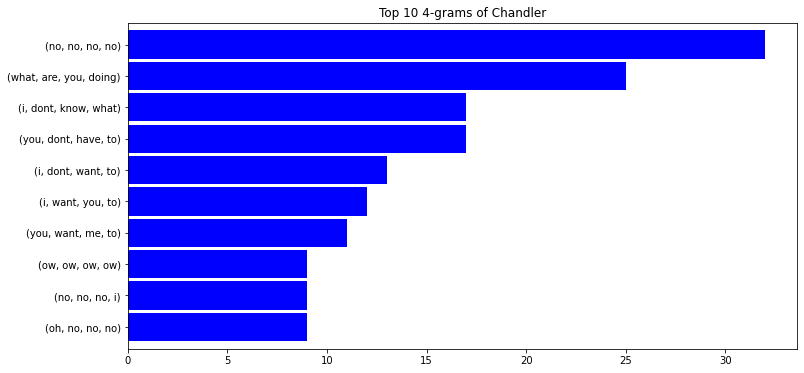

----------------------------------------------------------------------------------------------------
There are 37820. 2-grams for Monica


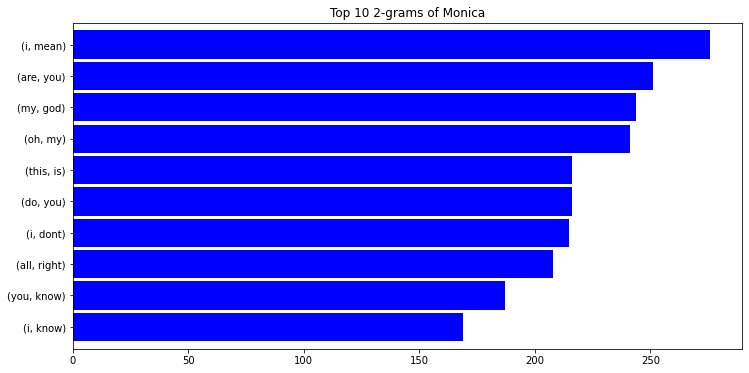

----------------------------------------------------------------------------------------------------
There are 68128. 3-grams for Monica


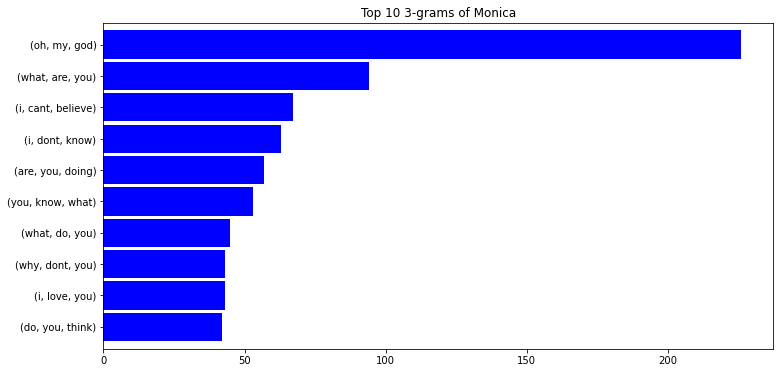

----------------------------------------------------------------------------------------------------
There are 77959. 4-grams for Monica


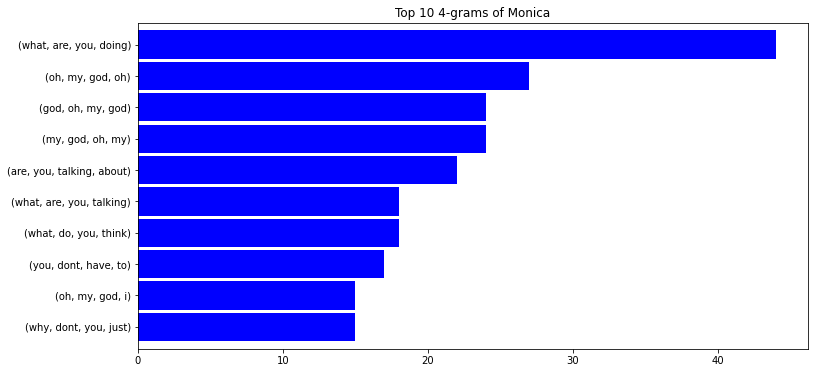

----------------------------------------------------------------------------------------------------
There are 39845. 2-grams for Joey


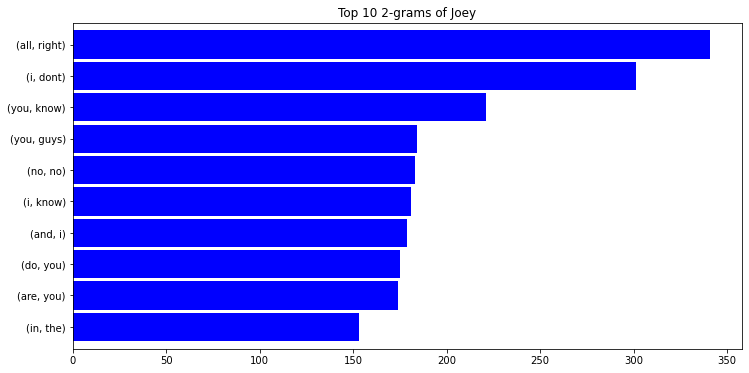

----------------------------------------------------------------------------------------------------
There are 71806. 3-grams for Joey


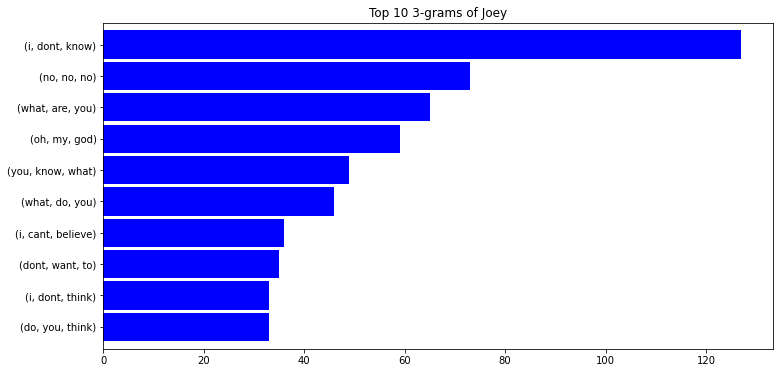

----------------------------------------------------------------------------------------------------
There are 81917. 4-grams for Joey


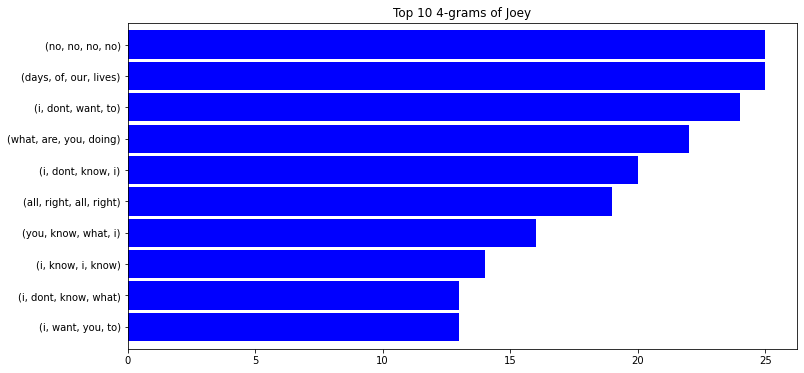

----------------------------------------------------------------------------------------------------
There are 37929. 2-grams for Phoebe


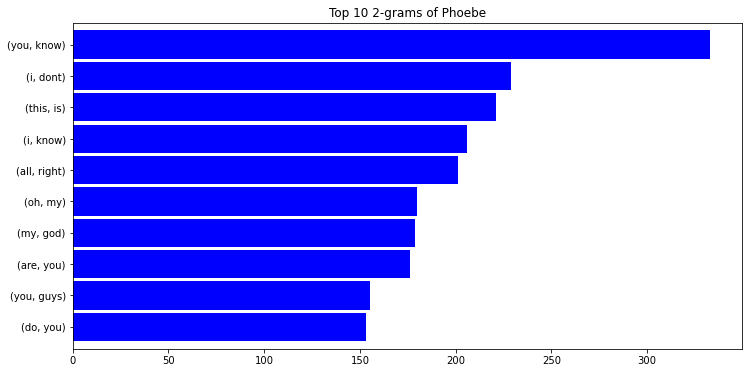

----------------------------------------------------------------------------------------------------
There are 67917. 3-grams for Phoebe


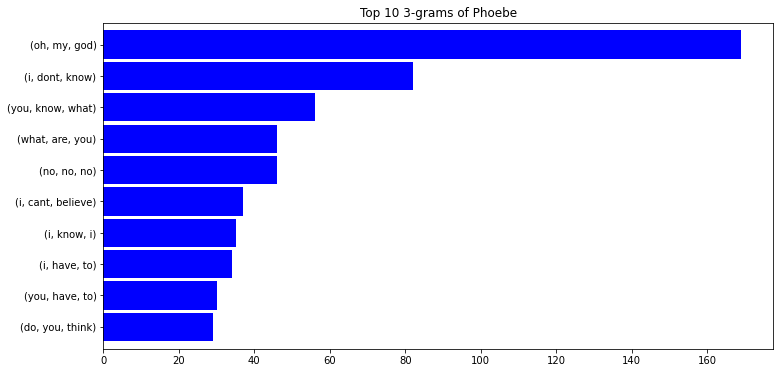

----------------------------------------------------------------------------------------------------
There are 77156. 4-grams for Phoebe


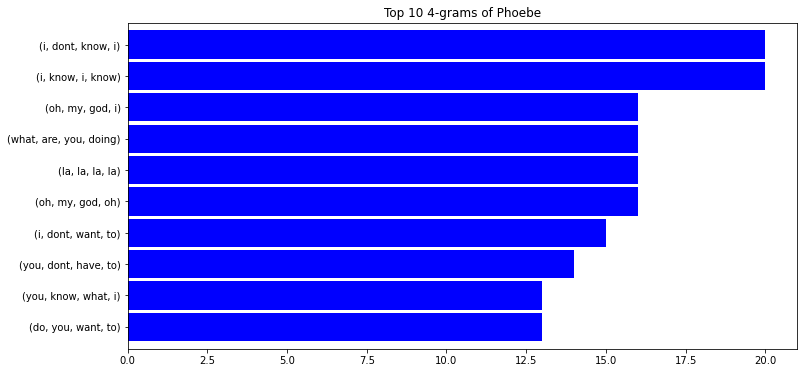

----------------------------------------------------------------------------------------------------


In [62]:
# Character-wise n-grams

for character in chars:
    all_words = ' '.join(scripts[scripts.Speaker == character].Dialog.values)
    for n in [2, 3, 4]:
        ngram_series = pd.Series(ngrams(all_words.split(), n)).value_counts()
        ngram_series[:10].sort_values().plot.barh(color='blue', width=.9, figsize=(12, 6))

        print(f"There are {len(ngram_series)}. {n}-grams for {character}")

        plt.title(f"Top 10 {n}-grams of {character}")
        plt.show()

        print('-' * 100)